In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_9212\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [51]:
df=pd.read_csv("weight-height.csv")
df.sample(4)

,Gender,Height,Weight
3630,Male,67.290283,187.001020
1083,Male,71.092956,198.829117
2290,Male,63.273151,143.248672
3034,Male,71.363595,212.594865


#using percentile to detetct outliers.
#we set the amouunt of duistribution on the oth side like if  say more then 90% are outlier and less then 5% are outlier.
1:Detected the outlier remove them
2: capping -->it is called winserization.

In [52]:
df.isnull().mean()

Gender    0.0
Height    0.0
Weight    0.0
dtype: float64

In [53]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_9212\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

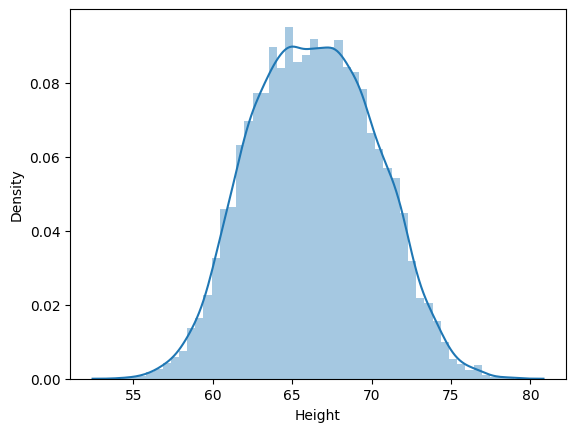

In [16]:
sns.distplot(df["Height"])

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_9212\3250964047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


Text(0.5, 1.0, 'Weight')

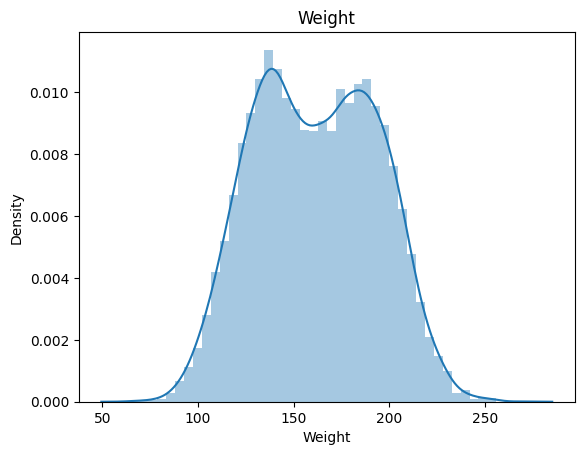

In [54]:
sns.distplot(df["Weight"])
plt.title("Weight")

Text(0.5, 1.0, 'Height')

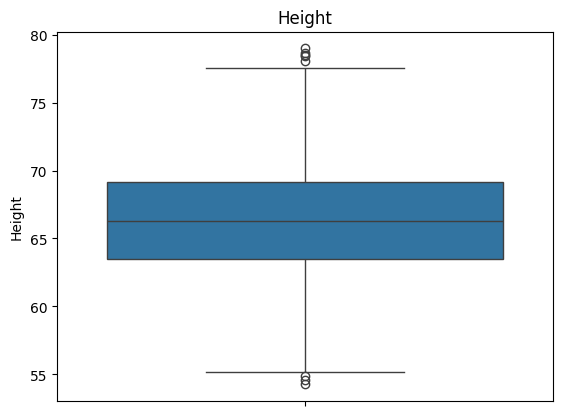

In [21]:
sns.boxplot(df["Height"])
plt.title("Height")

Text(0.5, 1.0, 'Weight')

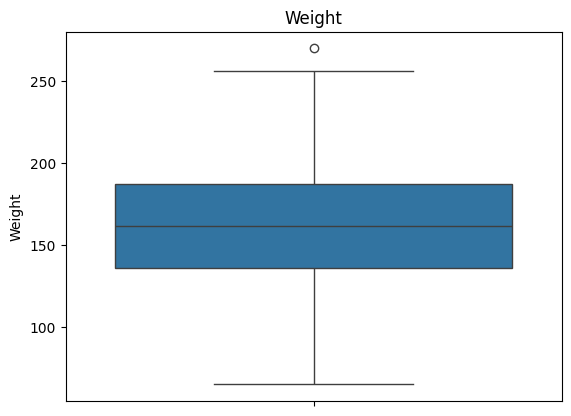

In [55]:
sns.boxplot(df["Weight"])
plt.title("Weight")

In [56]:
upper_limit=df["Height"].quantile(0.99)
lower_limit=df["Height"].quantile(0.01)

In [57]:
lower_limit
upper_limit


74.7857900583366

In [58]:
df[(df["Height"] >=upper_limit) | (df["Height"] <=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [66]:
df["Height"]=np.where(
    df["Height"]>=upper_limit,
    upper_limit,
    np.where(df["Height"]<=lower_limit,
    lower_limit,
    df["Height"])
)

<Axes: ylabel='Height'>

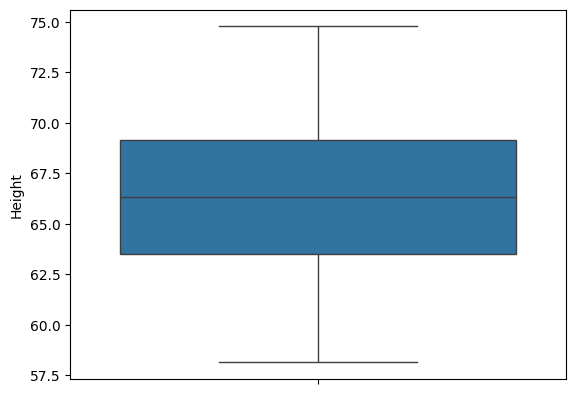

In [68]:
sns.boxplot(df["Height"])

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_9212\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])


<Axes: xlabel='Height', ylabel='Density'>

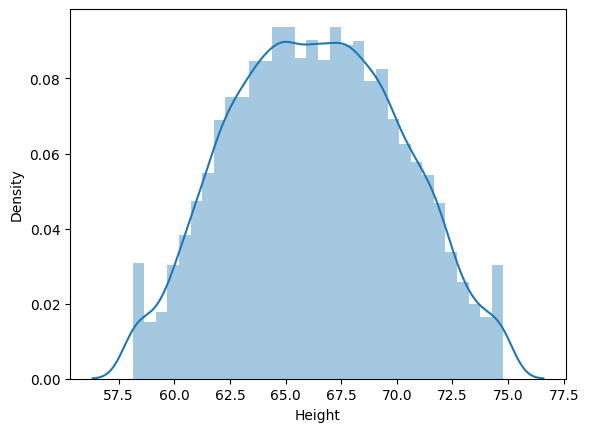

In [69]:
sns.distplot(df["Height"])

In [71]:
df["Height"].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [ ]:
count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742